#### Import libraries

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


#### Load dataset

In [2]:

customer_features = pd.read_csv("Final_clean_data.csv")


#### Feature engineering for clustering

In [5]:
cluster_data = customer_features.groupby("CustomerID").agg({
    "TotalValue": "sum",
    "Quantity": "sum",
    "ProductID": "nunique",
    "Category": "nunique"
}).reset_index()

#Normalize numerical features
scaler = StandardScaler()
numerical_features = ["TotalValue", "Quantity", "ProductID", "Category"]
cluster_data[numerical_features] = scaler.fit_transform(cluster_data[numerical_features])


#### Apply K-Means clustering

In [6]:
kmeans = KMeans(n_clusters=4, random_state=42)  # Choose 4 clusters for example
cluster_data["Cluster"] = kmeans.fit_predict(cluster_data[numerical_features])

Davies-Bouldin Index: 1.0462337077934158


c:\Users\Avita\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


#### Compute Davies-Bouldin Index

In [8]:

db_index = davies_bouldin_score(cluster_data[numerical_features], cluster_data["Cluster"])
print(f"Davies-Bouldin Index: {db_index}")


Davies-Bouldin Index: 1.0462337077934158


#### Visualize clusters using PCA

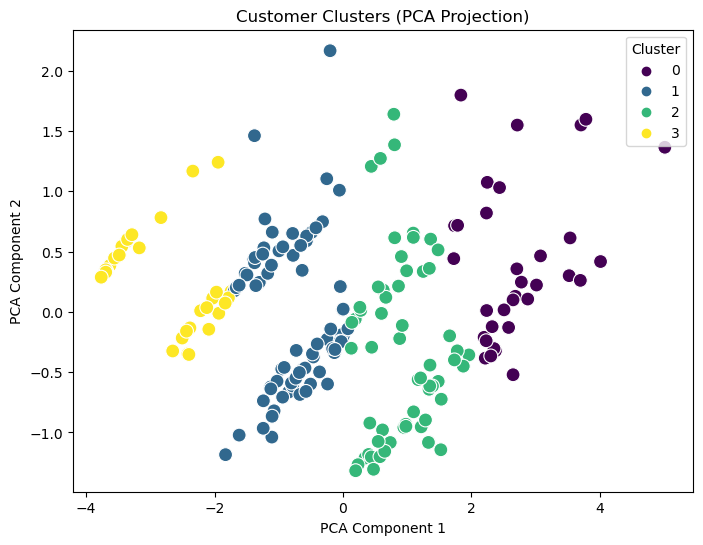

In [9]:

pca = PCA(n_components=2)
pca_features = pca.fit_transform(cluster_data[numerical_features])
cluster_data["PCA1"] = pca_features[:, 0]
cluster_data["PCA2"] = pca_features[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="PCA1", y="PCA2", hue="Cluster",
    data=cluster_data, palette="viridis", s=100
)
plt.title("Customer Clusters (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()